In [1]:
from model.functions import get_stratified_data

train_set, test_set = get_stratified_data()

train_set.head()

,show_id,user_id,rating,primary_title,start_year,end_year,genres,average_rating,num_votes,is_liked
33408,e48e5297-a24b-41e0-a1da-c5f5322cd007,c42beed5-c9a7-4f90-b97d-e6e824fe509e,10,The Expanse,2015,2022,"Drama,Mystery,Sci-Fi",8.5,166785,1
67765,1121bc1b-f87d-4200-89bf-328aecff8156,1687b1c5-463a-4d62-8c10-37e207ed5538,10,Attack on Titan,2013,2023,"Action,Adventure,Animation",9.1,471317,1
4592,984ed8bf-574c-4d39-8052-29ee50bf4993,1f9ef9b4-ec93-4eab-98f4-28eea4c4e697,10,Mr. Robot,2015,2019,"Crime,Drama,Thriller",8.5,409112,1
146433,54b35648-70d7-4271-8a59-976388fe6b86,931a915d-0a29-4d10-91e9-3a42a1cd0074,8,Sex Education,2019,2023,"Comedy,Drama",8.3,336325,1
168075,7c3395f5-6954-4fe4-ab4c-91c8129487ec,ba841fb2-a6c2-4ac0-94c8-3c5512343a2e,8,Homeland,2011,2020,"Crime,Drama,Mystery",8.3,355715,1


In [2]:
from model.pipelines import get_knn_graph_pipeline

pipeline = get_knn_graph_pipeline()
data = pipeline.fit_transform(train_set)

data.head()

show_id_encoded,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
user_id_encoded,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.neighbors import NearestNeighbors


model = NearestNeighbors(n_neighbors=5, metric='jaccard', n_jobs=-1)
model.fit(data.T)

NearestNeighbors(metric='jaccard', n_jobs=-1)

In [4]:
import networkx as nx

graph = nx.Graph()

for show in data.columns:
    show_data = data[[show]].T
    _, indices = model.kneighbors(show_data, n_neighbors=5)
    similar_shows = data.iloc[indices[0]].index.tolist()

    for similar_show in similar_shows:
        if similar_show != show:
            graph.add_edge(show, similar_show)

/Users/mav/code/personal/canihaveatvshowplz/.venv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/mav/code/personal/canihaveatvshowplz/.venv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/mav/code/personal/canihaveatvshowplz/.venv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/mav/code/personal/canihaveatvshowplz/.venv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/mav/code/personal/canihaveatvshowplz/.venv/lib/python3.11/site-packages/sklea

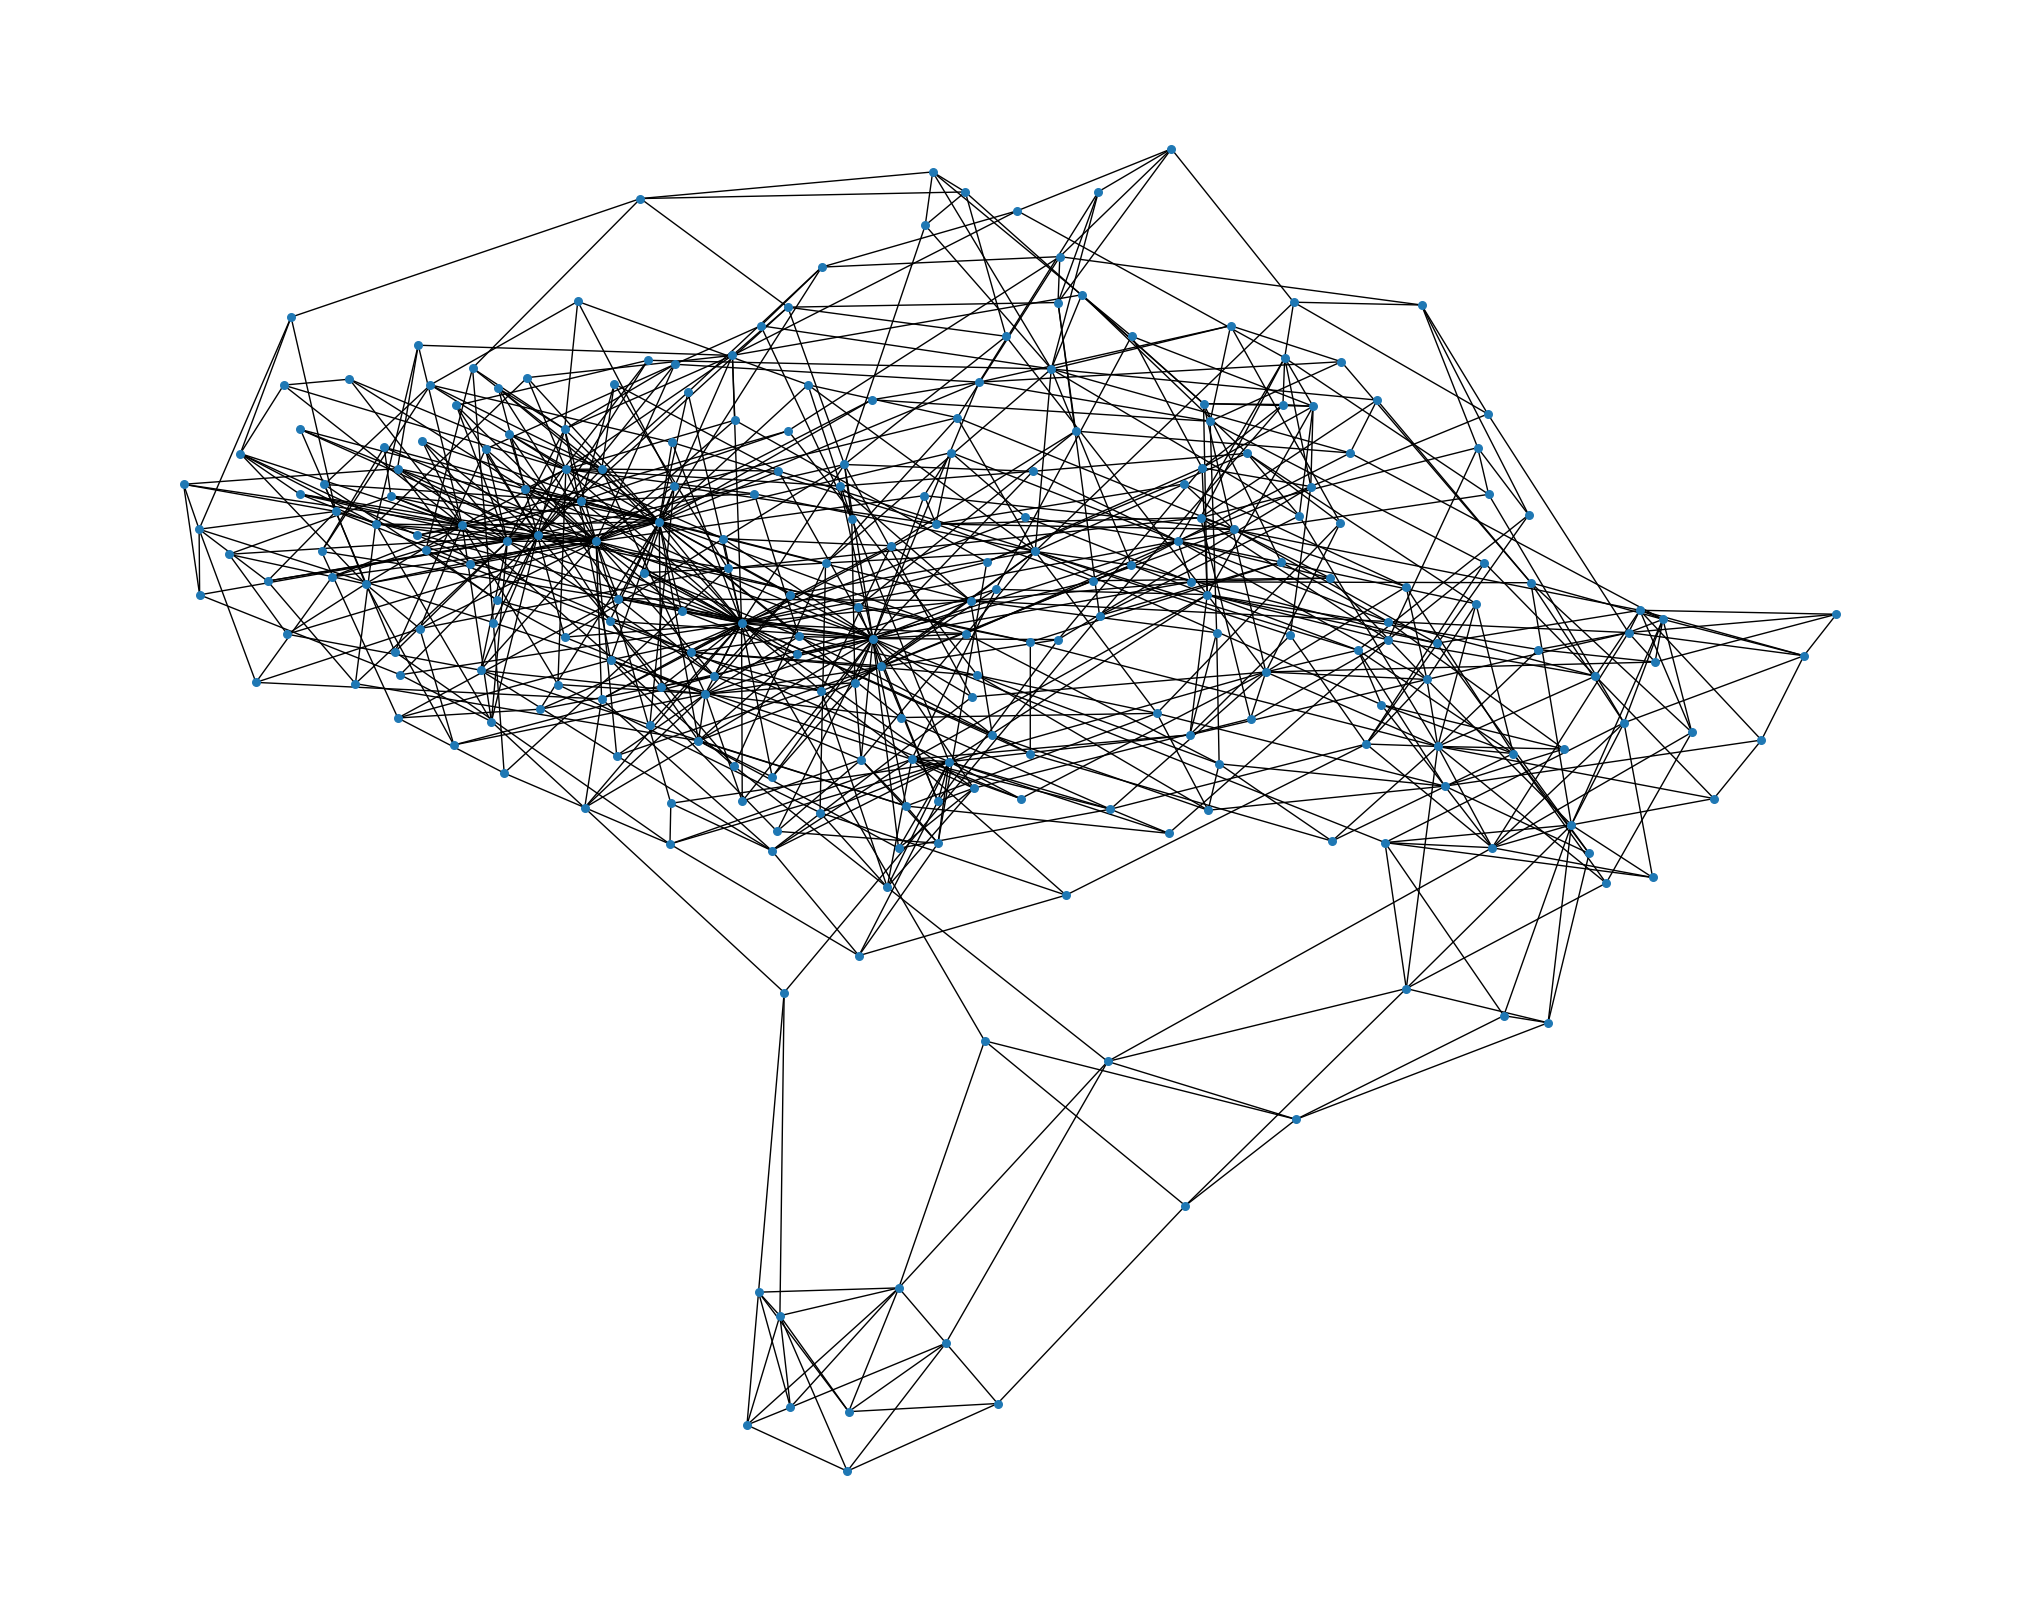

In [5]:

from matplotlib import pyplot as plt

plt.figure(figsize=(20, 16))
pos = nx.spring_layout(graph)  # Layout algorithm to position nodes
nx.draw(graph, pos, with_labels=False, node_size=30)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

def generate_show_recommendations(graph, show_ids, top_n=5):
    similar_shows = {}

    for show_id in show_ids:
        if show_id in graph:
            neighbors = list(graph.neighbors(show_id))

            # Count common neighbors for each neighbor of the input show
            for neighbor in neighbors:
                if neighbor != show_id:
                    if neighbor in similar_shows:
                        similar_shows[neighbor] += 1
                    else:
                        similar_shows[neighbor] = 1

    sorted_shows = sorted(similar_shows.items(), key=lambda x: x[1], reverse=True)

    recommended_shows = [show[0] for show in sorted_shows[:top_n] if show[0] not in show_ids]

    return recommended_shows

show_ids = [
    "b442937f-19dc-4429-96f5-6d4b6e733f2c", # The Wire
    "387c6565-98ab-4342-ae8e-fb7faef78af0", # The Sopranos
]

label_encoder = LabelEncoder()
label_encoder.fit_transform(train_set['show_id'])
encoded_show_ids = label_encoder.transform(show_ids)

recommended_shows = generate_show_recommendations(graph, encoded_show_ids)

decoded_recommended_shows = label_encoder.inverse_transform(recommended_shows)

print(decoded_recommended_shows)

['5664e796-6468-4bd2-aaab-6a3660804ab2'
 '24d25aee-0a68-458c-8c05-a2d792babaa6'
 '476a30fd-5f99-4bee-9731-a74c580cde97'
 'cd337223-a2b6-43ac-a3cb-0ffabd8bf528']


TODO: output graph and encoder
```
import pickle

# Assuming 'graph' is your NetworkX graph
with open('your_graph.pkl', 'wb') as f:
    pickle.dump(graph, f)
```